In [ ]:
import numpy as np
import keras

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Importing required modules
import numpy as np   
import pandas as pd
import h5py
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# ModelCheckPoint saves the model after every epoch.
# EarlyStopping stops training when a monitored quantity has stopped improving
# History records events into a History object
from keras.callbacks import ModelCheckpoint, EarlyStopping, History

# To use the colored() function to print texts in colours
from termcolor import colored

In [1]:
from keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 2s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

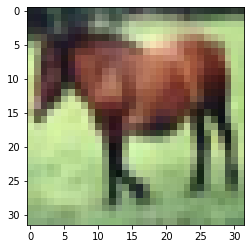

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[7].reshape(32,32,3))
plt.show()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
y_train_actual = y_train
y_test_actual = y_test

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.01, patience=10)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), padding= 'same', activation= 'relu', input_shape = (32,32,3)))

model.add(Conv2D(64,kernel_size = (3,3), padding = 'same', activation= 'relu' ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout((0.25)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout((0.25)))

model.add(Dense(10, activation= 'softmax'))


In [ ]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy


In [ ]:
model.compile(loss = categorical_crossentropy, optimizer= Adam(lr = 0.01),  metrics = ['accuracy'])

In [ ]:
answers=model.fit(X_train,y_train,validation_data=(X_test,y_test),shuffle=True,epochs=100,verbose=2,batch_size=500, callbacks=[early_stopping])

Epoch 1/100
100/100 - 198s - loss: 2.4288 - accuracy: 0.1764 - val_loss: 1.9370 - val_accuracy: 0.3036
Epoch 2/100
100/100 - 200s - loss: 1.8842 - accuracy: 0.3162 - val_loss: 1.6403 - val_accuracy: 0.4083
Epoch 3/100
100/100 - 197s - loss: 1.6543 - accuracy: 0.4012 - val_loss: 1.5048 - val_accuracy: 0.4550
Epoch 4/100
100/100 - 196s - loss: 1.5683 - accuracy: 0.4327 - val_loss: 1.4510 - val_accuracy: 0.4737
Epoch 5/100
100/100 - 203s - loss: 1.5173 - accuracy: 0.4478 - val_loss: 1.4255 - val_accuracy: 0.4867
Epoch 6/100
100/100 - 197s - loss: 1.4760 - accuracy: 0.4649 - val_loss: 1.3971 - val_accuracy: 0.4875
Epoch 7/100
100/100 - 195s - loss: 1.4618 - accuracy: 0.4701 - val_loss: 1.3763 - val_accuracy: 0.4963
Epoch 8/100
100/100 - 195s - loss: 1.4294 - accuracy: 0.4799 - val_loss: 1.4027 - val_accuracy: 0.4972
Epoch 9/100
100/100 - 196s - loss: 1.4178 - accuracy: 0.4887 - val_loss: 1.3501 - val_accuracy: 0.5188
Epoch 10/100
100/100 - 195s - loss: 1.3862 - accuracy: 0.4981 - val_loss:

In [ ]:
print(answers.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
X_test.class_indices

AttributeError: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


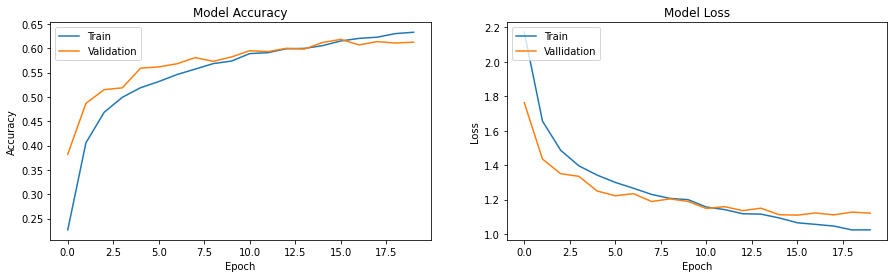

In [ ]:
print(answers.history.keys())

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15,4)) # With sharey=False, both plots will have their own y-axis and need not share the same range of values


ax1.plot(answers.history['accuracy'])
ax1.plot(answers.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# summarize history for loss
ax2.plot(answers.history['loss'])
ax2.plot(answers.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Vallidation'], loc='upper left')
plt.show()

In [ ]:
X_train.

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 10s 31ms/step - loss: 1.4519 - accuracy: 0.4810
Test loss: 1.4518673419952393
Test accuracy: 0.48100000619888306
